In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from matplotlib.pyplot import hist 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [2]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [3]:
train = pd.read_csv("C:/Users/USER/Downloads/train_users_2.csv/train_users_2.csv")
test = pd.read_csv("C:/Users/USER/Downloads/test_users.csv/test_users.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [6]:
X_train = train.drop(['date_first_booking', 'country_destination'], axis=1)
X_test = test.drop(['date_first_booking'], axis=1)

In [70]:
train['country_destination'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [8]:
train['country_destination'] = train['country_destination'].replace({'NDF':1,'US':2,'other':3, 'FR':4, 'CA':5, 'GB':6, 'ES':7, 'IT':8, 'PT':9, 'NL':10,'DE':11,'AU':12})
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,1
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,1
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,3
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2


In [9]:
X=pd.concat((X_train, X_test), axis=0, ignore_index=True)
X.shape

(275547, 14)

In [10]:
y_des = train[['country_destination']]
y_des['country_destination'] = y_des['country_destination'].replace({'NDF':1,'US':2,'other':3, 'FR':4, 'CA':5, 'GB':6, 'ES':7, 'IT':8, 'PT':9, 'NL':10,'DE':11,'AU':12})

C:\Users\USER\AppData\Local\Temp\ipykernel_15024\3567434037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_des['country_destination'] = y_des['country_destination'].replace({'NDF':1,'US':2,'other':3, 'FR':4, 'CA':5, 'GB':6, 'ES':7, 'IT':8, 'PT':9, 'NL':10,'DE':11,'AU':12})


In [11]:
X.fillna(method='pad').head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [12]:
X.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
gender                          0
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
dtype: int64

In [13]:
X.loc[X.age > 90, 'age'] = -1
X.loc[X.age < 13, 'age'] = -1
X['age'].describe()

count    158681.000000
mean         35.268066
std          12.392166
min          -1.000000
25%          28.000000
50%          33.000000
75%          41.000000
max          90.000000
Name: age, dtype: float64

In [14]:
X.loc[X.age.isnull(), 'age']=X.age.mean()

In [15]:
dac = np.vstack(
    X.date_account_created.astype(str).apply(
        lambda x: list(map(int, x.split('-')))
    ).values
)
X['dac_year'] = dac[:, 0]
X['dac_month'] = dac[:, 1]
X['dac_day'] = dac[:, 2]
X = X.drop(['date_account_created'], axis=1)
X.head()

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,dac_year,dac_month,dac_day
0,gxn3p5htnn,20090319043255,-unknown-,35.268066,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28
1,820tgsjxq7,20090523174809,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25
2,4ft3gnwmtx,20090609231247,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28
3,bjjt8pjhuk,20091031060129,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5
4,87mebub9p4,20091208061105,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14


In [16]:
for i in X.columns:
    print(i)

id
timestamp_first_active
gender
age
signup_method
signup_flow
language
affiliate_channel
affiliate_provider
first_affiliate_tracked
signup_app
first_device_type
first_browser
dac_year
dac_month
dac_day


## Correlation matrix

In [17]:
corr_matrix = X.corr()
corr_matrix.style.background_gradient(cmap = 'RdYlGn')

,timestamp_first_active,age,signup_flow,dac_year,dac_month,dac_day
timestamp_first_active,1.000000,-0.067322,0.232152,0.998953,-0.223167,0.011501
age,-0.067322,1.000000,-0.066375,-0.066523,-0.001844,-0.003767
signup_flow,0.232152,-0.066375,1.000000,0.229515,0.028751,0.028629
dac_year,0.998953,-0.066523,0.229515,1.000000,-0.254234,0.010919
dac_month,-0.223167,-0.001844,0.028751,-0.254234,1.000000,-0.011562
dac_day,0.011501,-0.003767,0.028629,0.010919,-0.011562,1.000000


In [18]:
oh_features = ['signup_method', 'signup_flow', 'language', 'gender',
                'affiliate_channel', 'affiliate_provider',
                'first_affiliate_tracked', 'signup_app',
                'first_device_type', 'first_browser']

In [19]:
for feature in oh_features:
    X_dummy = pd.get_dummies(X[feature], prefix=feature)
    X = X.drop([feature], axis=1)
    X = pd.concat((X, X_dummy), axis=1)
X.head()

,id,timestamp_first_active,age,dac_year,dac_month,dac_day,signup_method_basic,signup_method_facebook,signup_method_google,signup_method_weibo,...,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,gxn3p5htnn,20090319043255,35.268066,2010,6,28,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,20090523174809,38.000000,2011,5,25,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,20090609231247,56.000000,2010,9,28,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,20091031060129,42.000000,2011,12,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,20091208061105,41.000000,2010,9,14,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X.isnull().sum()

id                                0
timestamp_first_active            0
age                               0
dac_year                          0
dac_month                         0
                                 ..
first_browser_TenFourFox          0
first_browser_TheWorld Browser    0
first_browser_UC Browser          0
first_browser_Yandex.Browser      0
first_browser_wOSBrowser          0
Length: 159, dtype: int64

## Splitting data into test and train 

In [21]:
X_train = X.iloc[:len(train), :]          #selection of specific columns
X_test = X.iloc[len(train):, :]           #selection of specific solumns
X_train = X_train.drop(['id'], axis=1)
X_train.shape
X_test = X_test.drop(['id'], axis=1)

In [22]:
le = LabelEncoder()
y_trans = le.fit_transform(y_des)
y_trans.shape


C:\Users\USER\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(213451,)

In [23]:
dtrain, dtest, train_label, test_label = train_test_split(X_train, y_trans, test_size = 0.5, random_state = 817)

In [24]:
train_label.shape

(106725,)

In [25]:
dtrain.shape

(106725, 158)

In [26]:
test.shape

(62096, 15)

In [27]:
pd.set_option('display.max_columns', None)
dtrain.head()


,timestamp_first_active,age,dac_year,dac_month,dac_day,signup_method_basic,signup_method_facebook,signup_method_google,signup_method_weibo,signup_flow_0,signup_flow_1,signup_flow_2,signup_flow_3,signup_flow_4,signup_flow_5,signup_flow_6,signup_flow_8,signup_flow_10,signup_flow_12,signup_flow_14,signup_flow_15,signup_flow_16,signup_flow_20,signup_flow_21,signup_flow_23,signup_flow_24,signup_flow_25,language_-unknown-,language_ca,language_cs,language_da,language_de,language_el,language_en,language_es,language_fi,language_fr,language_hr,language_hu,language_id,language_is,language_it,language_ja,language_ko,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,affiliate_provider_baidu,affiliate_provider_bing,affiliate_provider_craigslist,affiliate_provider_daum,affiliate_provider_direct,affiliate_provider_email-marketing,affiliate_provider_facebook,affiliate_provider_facebook-open-graph,affiliate_provider_google,affiliate_provider_gsp,affiliate_provider_meetup,affiliate_provider_naver,affiliate_provider_other,affiliate_provider_padmapper,affiliate_provider_vast,affiliate_provider_wayn,affiliate_provider_yahoo,affiliate_provider_yandex,first_affiliate_tracked_linked,first_affiliate_tracked_local ops,first_affiliate_tracked_marketing,first_affiliate_tracked_omg,first_affiliate_tracked_product,first_affiliate_tracked_tracked-other,first_affiliate_tracked_untracked,signup_app_Android,signup_app_Moweb,signup_app_Web,signup_app_iOS,first_device_type_Android Phone,first_device_type_Android Tablet,first_device_type_Desktop (Other),first_device_type_Mac Desktop,first_device_type_Other/Unknown,first_device_type_SmartPhone (Other),first_device_type_Windows Desktop,first_device_type_iPad,first_device_type_iPhone,first_browser_-unknown-,first_browser_AOL Explorer,first_browser_Android Browser,first_browser_Apple Mail,first_browser_Arora,first_browser_Avant Browser,first_browser_BlackBerry Browser,first_browser_Camino,first_browser_Chrome,first_browser_Chrome Mobile,first_browser_Chromium,first_browser_CometBird,first_browser_Comodo Dragon,first_browser_Conkeror,first_browser_CoolNovo,first_browser_Crazy Browser,first_browser_Epic,first_browser_Firefox,first_browser_Flock,first_browser_Google Earth,first_browser_Googlebot,first_browser_IBrowse,first_browser_IE,first_browser_IE Mobile,first_browser_IceDragon,first_browser_IceWeasel,first_browser_Iron,first_browser_Kindle Browser,first_browser_Maxthon,first_browser_Mobile Firefox,first_browser_Mobile Safari,first_browser_Mozilla,first_browser_NetNewsWire,first_browser_Nintendo Browser,first_browser_OmniWeb,first_browser_Opera,first_browser_Opera Mini,first_browser_Opera Mobile,first_browser_Outlook 2007,first_browser_PS Vita browser,first_browser_Pale Moon,first_browser_Palm Pre web browser,first_browser_RockMelt,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
168780,20140328071548,35.268066,2014,3,28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50482,20121130055801,27.000000,2012,11,30,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,

In [28]:
X = X.drop(['id'], axis=1)

In [29]:
pd.set_option('display.max_columns', None)
X.head()

,timestamp_first_active,age,dac_year,dac_month,dac_day,signup_method_basic,signup_method_facebook,signup_method_google,signup_method_weibo,signup_flow_0,signup_flow_1,signup_flow_2,signup_flow_3,signup_flow_4,signup_flow_5,signup_flow_6,signup_flow_8,signup_flow_10,signup_flow_12,signup_flow_14,signup_flow_15,signup_flow_16,signup_flow_20,signup_flow_21,signup_flow_23,signup_flow_24,signup_flow_25,language_-unknown-,language_ca,language_cs,language_da,language_de,language_el,language_en,language_es,language_fi,language_fr,language_hr,language_hu,language_id,language_is,language_it,language_ja,language_ko,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,affiliate_provider_baidu,affiliate_provider_bing,affiliate_provider_craigslist,affiliate_provider_daum,affiliate_provider_direct,affiliate_provider_email-marketing,affiliate_provider_facebook,affiliate_provider_facebook-open-graph,affiliate_provider_google,affiliate_provider_gsp,affiliate_provider_meetup,affiliate_provider_naver,affiliate_provider_other,affiliate_provider_padmapper,affiliate_provider_vast,affiliate_provider_wayn,affiliate_provider_yahoo,affiliate_provider_yandex,first_affiliate_tracked_linked,first_affiliate_tracked_local ops,first_affiliate_tracked_marketing,first_affiliate_tracked_omg,first_affiliate_tracked_product,first_affiliate_tracked_tracked-other,first_affiliate_tracked_untracked,signup_app_Android,signup_app_Moweb,signup_app_Web,signup_app_iOS,first_device_type_Android Phone,first_device_type_Android Tablet,first_device_type_Desktop (Other),first_device_type_Mac Desktop,first_device_type_Other/Unknown,first_device_type_SmartPhone (Other),first_device_type_Windows Desktop,first_device_type_iPad,first_device_type_iPhone,first_browser_-unknown-,first_browser_AOL Explorer,first_browser_Android Browser,first_browser_Apple Mail,first_browser_Arora,first_browser_Avant Browser,first_browser_BlackBerry Browser,first_browser_Camino,first_browser_Chrome,first_browser_Chrome Mobile,first_browser_Chromium,first_browser_CometBird,first_browser_Comodo Dragon,first_browser_Conkeror,first_browser_CoolNovo,first_browser_Crazy Browser,first_browser_Epic,first_browser_Firefox,first_browser_Flock,first_browser_Google Earth,first_browser_Googlebot,first_browser_IBrowse,first_browser_IE,first_browser_IE Mobile,first_browser_IceDragon,first_browser_IceWeasel,first_browser_Iron,first_browser_Kindle Browser,first_browser_Maxthon,first_browser_Mobile Firefox,first_browser_Mobile Safari,first_browser_Mozilla,first_browser_NetNewsWire,first_browser_Nintendo Browser,first_browser_OmniWeb,first_browser_Opera,first_browser_Opera Mini,first_browser_Opera Mobile,first_browser_Outlook 2007,first_browser_PS Vita browser,first_browser_Pale Moon,first_browser_Palm Pre web browser,first_browser_RockMelt,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,20090319043255,35.268066,2010,6,28,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20090523174809,38.000000,2011,5,25,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [30]:
i1 = pd.MultiIndex.from_frame(dtrain)
i2 = pd.MultiIndex.from_frame(X)
dtrain[~i1.isin(i2)]

,timestamp_first_active,age,dac_year,dac_month,dac_day,signup_method_basic,signup_method_facebook,signup_method_google,signup_method_weibo,signup_flow_0,signup_flow_1,signup_flow_2,signup_flow_3,signup_flow_4,signup_flow_5,signup_flow_6,signup_flow_8,signup_flow_10,signup_flow_12,signup_flow_14,signup_flow_15,signup_flow_16,signup_flow_20,signup_flow_21,signup_flow_23,signup_flow_24,signup_flow_25,language_-unknown-,language_ca,language_cs,language_da,language_de,language_el,language_en,language_es,language_fi,language_fr,language_hr,language_hu,language_id,language_is,language_it,language_ja,language_ko,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,affiliate_provider_baidu,affiliate_provider_bing,affiliate_provider_craigslist,affiliate_provider_daum,affiliate_provider_direct,affiliate_provider_email-marketing,affiliate_provider_facebook,affiliate_provider_facebook-open-graph,affiliate_provider_google,affiliate_provider_gsp,affiliate_provider_meetup,affiliate_provider_naver,affiliate_provider_other,affiliate_provider_padmapper,affiliate_provider_vast,affiliate_provider_wayn,affiliate_provider_yahoo,affiliate_provider_yandex,first_affiliate_tracked_linked,first_affiliate_tracked_local ops,first_affiliate_tracked_marketing,first_affiliate_tracked_omg,first_affiliate_tracked_product,first_affiliate_tracked_tracked-other,first_affiliate_tracked_untracked,signup_app_Android,signup_app_Moweb,signup_app_Web,signup_app_iOS,first_device_type_Android Phone,first_device_type_Android Tablet,first_device_type_Desktop (Other),first_device_type_Mac Desktop,first_device_type_Other/Unknown,first_device_type_SmartPhone (Other),first_device_type_Windows Desktop,first_device_type_iPad,first_device_type_iPhone,first_browser_-unknown-,first_browser_AOL Explorer,first_browser_Android Browser,first_browser_Apple Mail,first_browser_Arora,first_browser_Avant Browser,first_browser_BlackBerry Browser,first_browser_Camino,first_browser_Chrome,first_browser_Chrome Mobile,first_browser_Chromium,first_browser_CometBird,first_browser_Comodo Dragon,first_browser_Conkeror,first_browser_CoolNovo,first_browser_Crazy Browser,first_browser_Epic,first_browser_Firefox,first_browser_Flock,first_browser_Google Earth,first_browser_Googlebot,first_browser_IBrowse,first_browser_IE,first_browser_IE Mobile,first_browser_IceDragon,first_browser_IceWeasel,first_browser_Iron,first_browser_Kindle Browser,first_browser_Maxthon,first_browser_Mobile Firefox,first_browser_Mobile Safari,first_browser_Mozilla,first_browser_NetNewsWire,first_browser_Nintendo Browser,first_browser_OmniWeb,first_browser_Opera,first_browser_Opera Mini,first_browser_Opera Mobile,first_browser_Outlook 2007,first_browser_PS Vita browser,first_browser_Pale Moon,first_browser_Palm Pre web browser,first_browser_RockMelt,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser


## Feature Impotance 

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(dtrain, train_label)

ExtraTreesClassifier()

In [32]:
print(model.feature_importances_)

[2.01375298e-01 2.54164821e-01 2.02829715e-02 9.71916615e-02
 2.23825378e-01 9.09591452e-03 9.82754753e-03 6.87302960e-05
 0.00000000e+00 4.54459375e-03 1.55079120e-03 2.65662388e-03
 4.79749715e-03 0.00000000e+00 5.94270555e-05 2.08224709e-04
 4.94835132e-04 4.61811044e-06 6.54958279e-04 0.00000000e+00
 1.93972905e-05 2.04585966e-05 1.83215341e-05 3.01076151e-04
 3.76895958e-04 7.02145853e-04 9.42883229e-04 0.00000000e+00
 1.50218548e-05 6.28303712e-05 1.07400036e-04 8.49541891e-04
 9.74317473e-05 3.81122527e-03 1.11147332e-03 2.66967980e-05
 1.38716285e-03 0.00000000e+00 2.28418205e-05 1.01504850e-05
 1.88558347e-05 6.55388290e-04 4.19098589e-04 8.81308388e-04
 2.24075973e-04 9.29102172e-05 1.42159249e-04 3.85323823e-04
 5.91342516e-04 2.92680344e-04 3.74199437e-05 1.07539001e-04
 1.39828377e-03 2.10546267e-02 1.09891623e-02 1.06407215e-02
 5.39618058e-04 4.91282668e-04 3.29609779e-03 2.14194947e-03
 1.62712720e-03 1.05626285e-03 3.66504714e-03 3.45242758e-03
 2.65428954e-03 5.702819

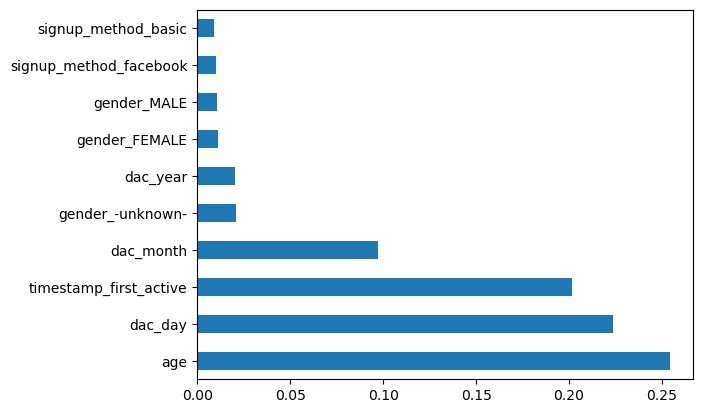

In [33]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [34]:
new_data = X[['age', 'dac_day','timestamp_first_active', 'dac_month', 'gender_-unknown-', 'dac_year', 'gender_FEMALE', 'signup_method_facebook', 'gender_MALE', 'signup_method_basic']]
new_data.head()

,age,dac_day,timestamp_first_active,dac_month,gender_-unknown-,dac_year,gender_FEMALE,signup_method_facebook,gender_MALE,signup_method_basic
0,35.268066,28,20090319043255,6,1,2010,0,1,0,0
1,38.000000,25,20090523174809,5,0,2011,0,1,1,0
2,56.000000,28,20090609231247,9,0,2010,1,0,0,1
3,42.000000,5,20091031060129,12,0,2011,1,1,0,0
4,41.000000,14,20091208061105,9,1,2010,0,0,0,1


In [35]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     275547 non-null  float64
 1   dac_day                 275547 non-null  int32  
 2   timestamp_first_active  275547 non-null  int64  
 3   dac_month               275547 non-null  int32  
 4   gender_-unknown-        275547 non-null  uint8  
 5   dac_year                275547 non-null  int32  
 6   gender_FEMALE           275547 non-null  uint8  
 7   signup_method_facebook  275547 non-null  uint8  
 8   gender_MALE             275547 non-null  uint8  
 9   signup_method_basic     275547 non-null  uint8  
dtypes: float64(1), int32(3), int64(1), uint8(5)
memory usage: 8.7 MB


In [36]:
X_new = new_data

In [46]:
from sklearn import model_selection
xtrain, xtest, ytrain, ytest = train_test_split(X_train, y_trans, test_size = 0.50, random_state = 817)

In [47]:
xtrain.shape

(106725, 158)

In [48]:
xtest.shape

(106726, 158)

In [49]:
ytrain.shape

(106725,)

In [50]:
ytest.shape

(106726,)

In [51]:
train_label

array([0, 0, 2, ..., 0, 0, 0], dtype=int64)

In [62]:

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)
  
print (xtrain[0:10, :])


[[ 1.0242303  -0.02170009  1.04006871 ...  0.         -0.00612217
  -0.00612217]
 [-1.05082089 -0.87965839 -1.09133422 ...  0.         -0.00612217
  -0.00612217]
 [ 1.01233556 -0.36081983  1.04006871 ...  0.         -0.00612217
  -0.00612217]
 ...
 [ 0.01687405 -1.08719381 -0.02563275 ...  0.         -0.00612217
  -0.00612217]
 [ 1.0548352   1.7145344   1.04006871 ...  0.         -0.00612217
  -0.00612217]
 [ 1.00109784 -0.02170009  1.04006871 ...  0.         -0.00612217
  -0.00612217]]


In [63]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

## Logistic regression 

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
pred_log=logreg.predict(xtest)
from sklearn.metrics import accuracy_score
print(accuracy_score(test_label, pred_log))

0.6040327567790417


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random forest 

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=20, n_estimators=100)
rfc.fit(xtrain, ytrain)
pred = rfc.predict(xtest)
print(accuracy_score(test_label, pred))

0.6243277177070254


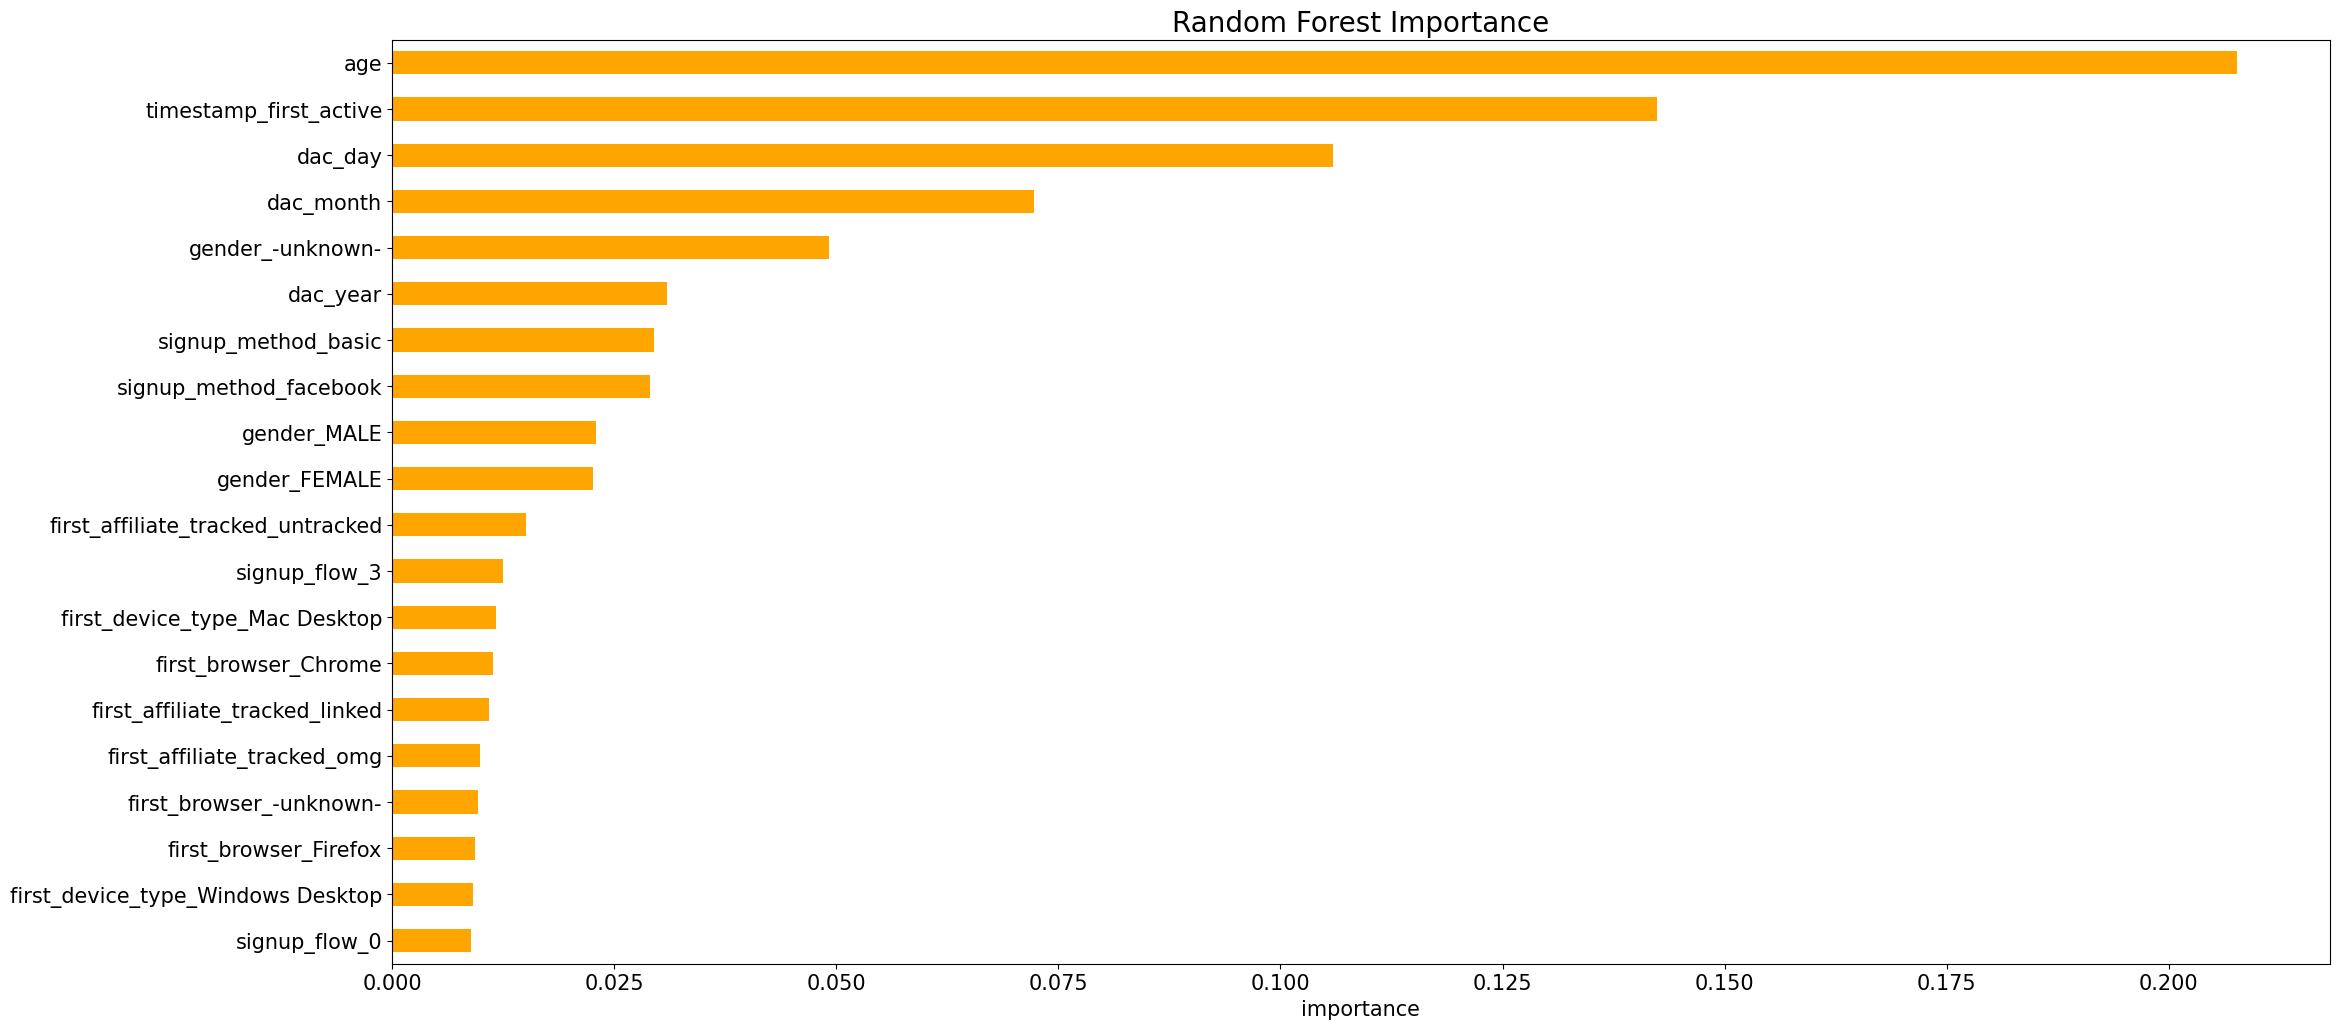

In [66]:
fi=pd.Series(rfc.feature_importances_, index=dtrain.columns)
fn=fi.sort_values(ascending=True)
fn[-20:].plot(kind='barh', color='orange', figsize=(25, 12))
plt.xlabel('importance', size=15)
plt.title('Random Forest Importance', size=20)
plt.tick_params(labelsize=15)

## Decision tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(xtrain, ytrain)
pred = dtc.predict(xtest)
print(accuracy_score(test_label, pred))

0.6306523246444166


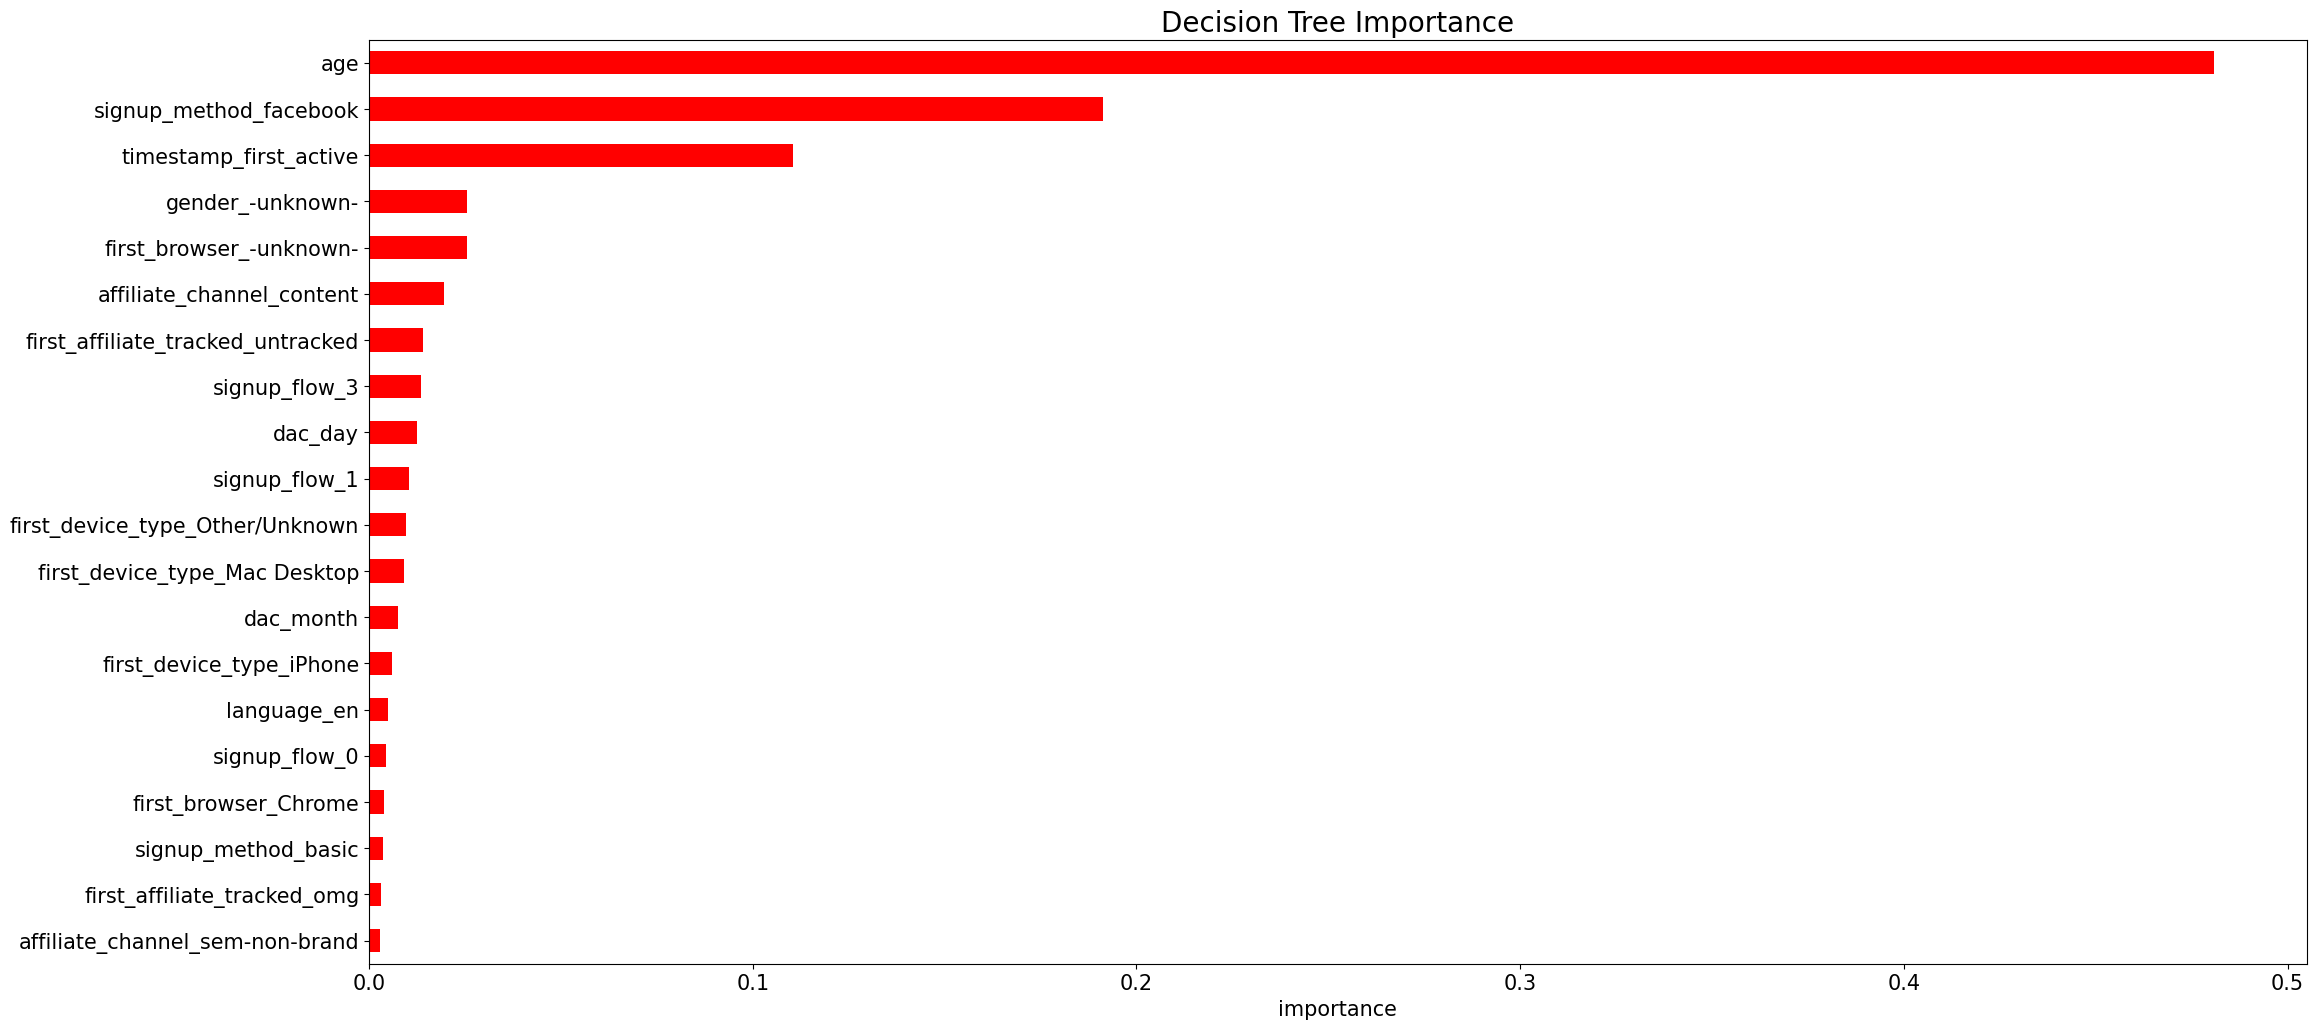

In [68]:
fi=pd.Series(dtc.feature_importances_, index=dtrain.columns)
fn=fi.sort_values(ascending=True)
fn[-20:].plot(kind='barh', color='red', figsize=(25, 12))
plt.xlabel('importance', size=15)
plt.title('Decision Tree Importance', size=20)
plt.tick_params(labelsize=15)

## Xgboost Classification 

In [69]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(max_depth=4, learning_rate=0.03, n_estimators=100,
                     subsample=0.6, colsample_bytree=0.6, seed=40)
xgb.fit(dtrain , train_label)
pred = xgb.predict(dtest) 
print(accuracy_score(test_label, pred))

0.6344939377471281
